# 1.1 Minimum current for at least one spike

I'm assuming that the current injection is constant.
Through manual binary search, we see that for 2.336, there is no spike, but at 2.337, there is a spike.
So, the minimum current for one spike is **~2.337 uA/cm^2**

In [1]:
#%matplotlib notebook
from HodgkinHuxley import HodgkinHuxley
model = HodgkinHuxley()
model.I_inj = lambda t: 2.336
model.gen_plots(["V"])

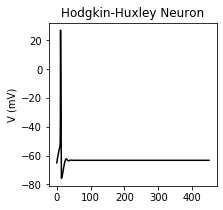

In [2]:
model.I_inj = lambda t: 2.337
model.gen_plots(["V"])

# 1.2 What is the minimum current you need to inject to get the cell to fire for the full duration?

**~6.260 uA/cm^2** current is the minimum. Here we see with 6.259, the cell stops firing towards the end, but at 6.260, it lasts for the entire duration.

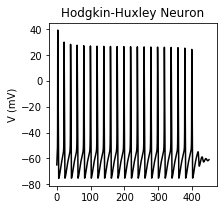

In [3]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.259
model.gen_plots(["V"])

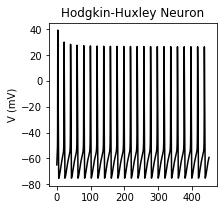

In [4]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.260
model.gen_plots(["V"])

# 1.3 How much does a 10-fold increase in injected current from the repetitive firing current increase the firing rate? 

Number of peaks = 23


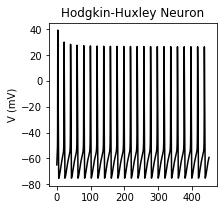

In [5]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.26
model.gen_plots(["V"])
print("Number of peaks =", HodgkinHuxley.count_peaks(model.V))

Number of peaks = 57


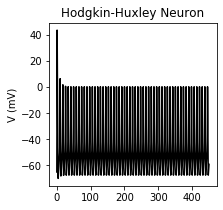

In [6]:
model = HodgkinHuxley()
model.I_inj = lambda t: 62.60
model.gen_plots(["V"])
print("Number of peaks =", HodgkinHuxley.count_peaks(model.V))

10-fold increase in injected current from 1.2 increases firing counts from **23 to 56 (~243% multiplier)**.

# 1.4 What happens for a 100-fold increase? Why does this happen?

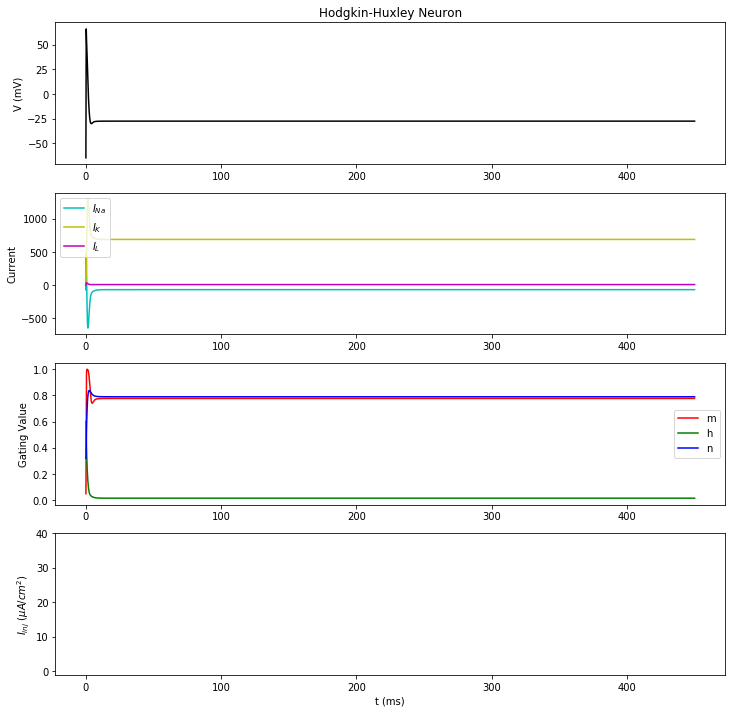

In [7]:
model = HodgkinHuxley()
model.I_inj = lambda t: 626.0
model.gen_plots(["V", "I", "gate", "I_ext"])

After the 100-fold increase, there is only 1 spike throughout the entire session.
TODO: Why?